# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Datasets/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df['treatment_cost']=df['charges']
df.drop('charges', axis=1, inplace=True)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,treatment_cost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,treatment_cost
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
df.shape

(1338, 7)

In [12]:
df1 = df.drop_duplicates()

In [13]:
df1.shape

(1337, 7)

# Encoding Categorical value to numerical value using Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
for column in df1.columns:
    if df1[column].dtype==np.number:
        continue
    df1[column]=encoder.fit_transform(df1[column])

In [17]:
df1.head()

,age,sex,bmi,children,smoker,region,treatment_cost
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


# Finding Correlation among data 

In [18]:
df1.corr()

,age,sex,bmi,children,smoker,region,treatment_cost
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
treatment_cost,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<AxesSubplot:>

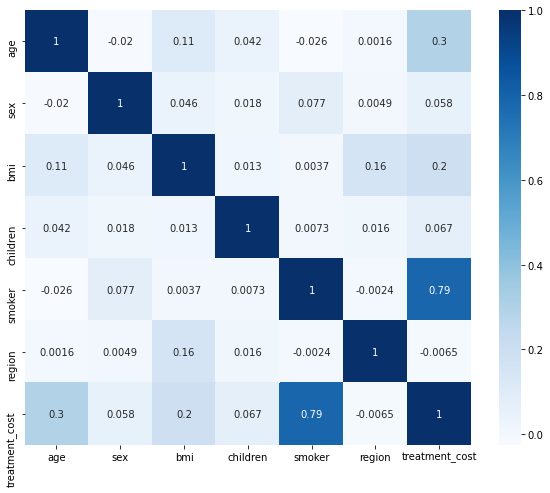

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), cmap='Blues', annot=True)

In [20]:
df1.corr()['treatment_cost'].sort_values()

region           -0.006547
sex               0.058044
children          0.067389
bmi               0.198401
age               0.298308
smoker            0.787234
treatment_cost    1.000000
Name: treatment_cost, dtype: float64

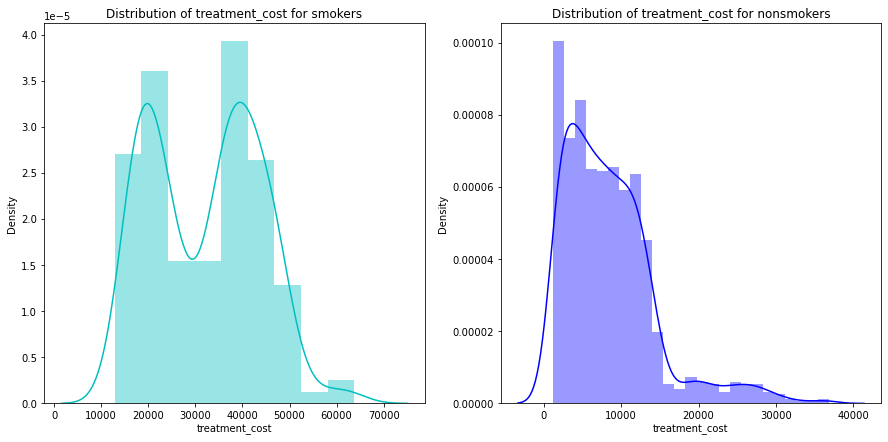

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Distribution of treatment_cost for smokers')
sns.distplot(df1[(df1.smoker == 1)]["treatment_cost"],color='c')

plt.subplot(1,2,2)
plt.title('Distribution of treatment_cost for nonsmokers')
sns.distplot(df1[(df1.smoker == 0)]["treatment_cost"],color='b')

plt.show()

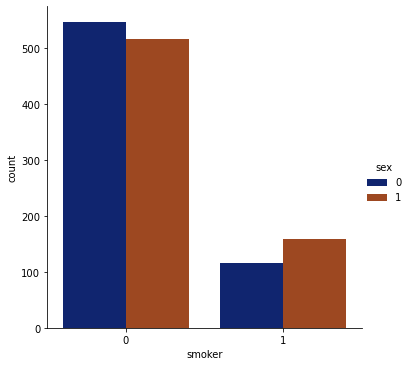

In [22]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="dark", data=df1)

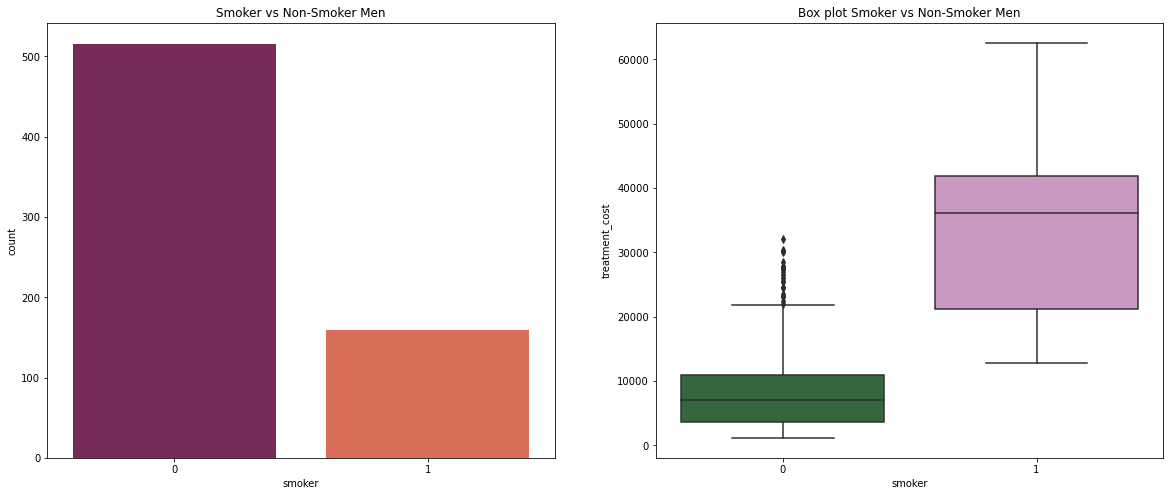

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Smoker vs Non-Smoker Men')
sns.countplot(x='smoker', palette=("rocket"), data= df1[df1['sex']==1])

plt.subplot(1,2,2)
plt.title('Box plot Smoker vs Non-Smoker Men')
sns.boxplot(x='smoker', y='treatment_cost', data= df1[df1['sex']==1], palette=("cubehelix"))

plt.show()


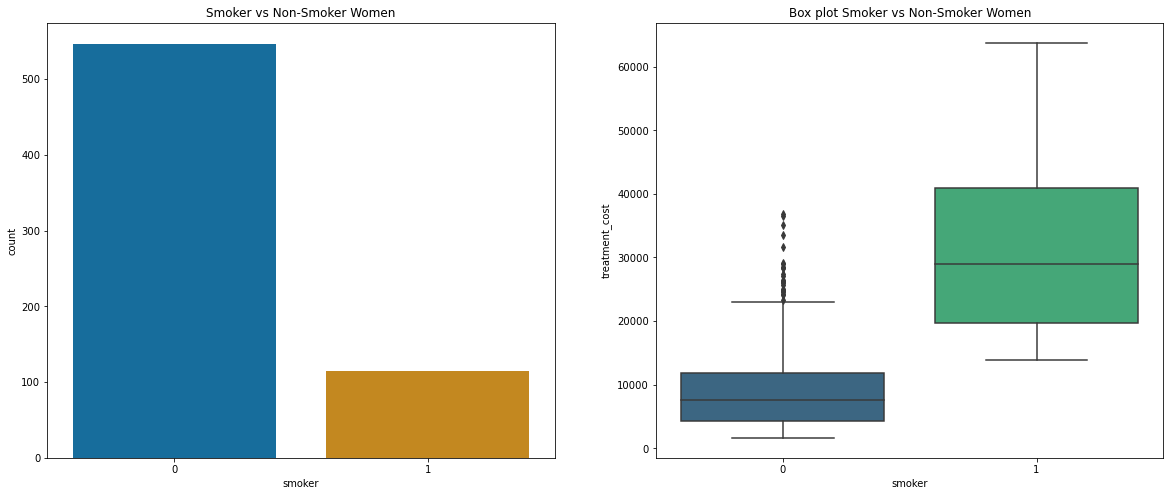

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Smoker vs Non-Smoker Women')
sns.countplot(x='smoker', palette=("colorblind"), data= df1[df1['sex']==0])

plt.subplot(1,2,2)
plt.title('Box plot Smoker vs Non-Smoker Women')
sns.boxplot(x='smoker', y='treatment_cost', data= df1[df1['sex']==0], palette=("viridis"))

plt.show()

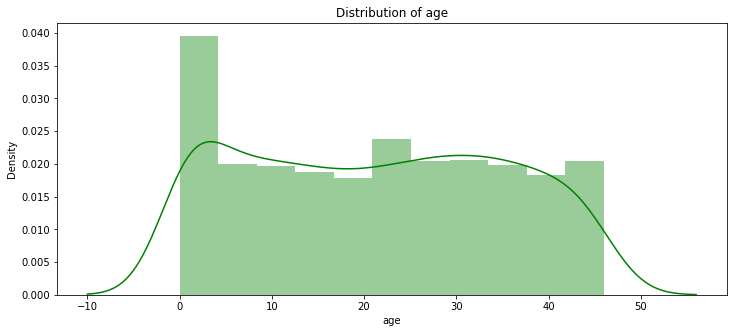

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df1["age"], color = 'g')
plt.show()

Text(0.5, 1.0, 'The number of smokers and non-smokers ( 30 years old)')

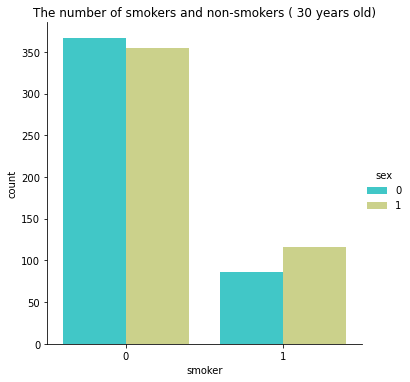

In [26]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df1[(df1.age <=30)])
plt.title("The number of smokers and non-smokers ( 30 years old)")

Text(0.5, 1.0, 'Smokers and non-smokers')

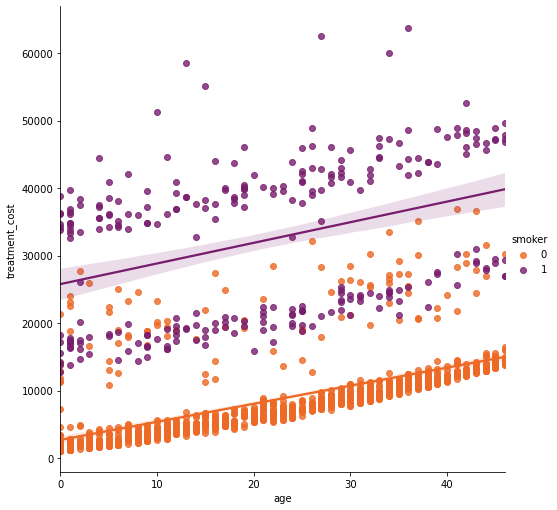

In [27]:
sns.lmplot(x="age", y="treatment_cost", hue="smoker", data=df1, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

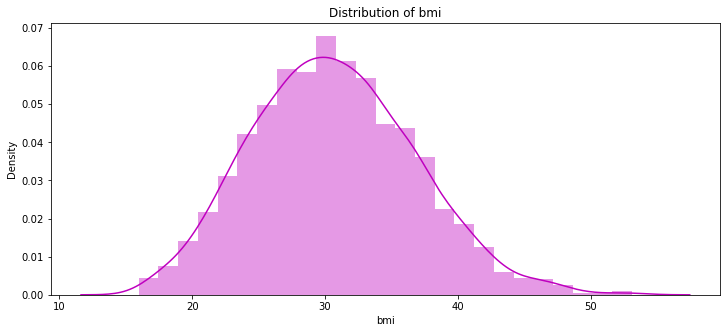

In [28]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df1["bmi"], color = 'm')

<AxesSubplot:title={'center':'Distribution of charges for patients with BMI greater than 30'}, xlabel='treatment_cost', ylabel='Density'>

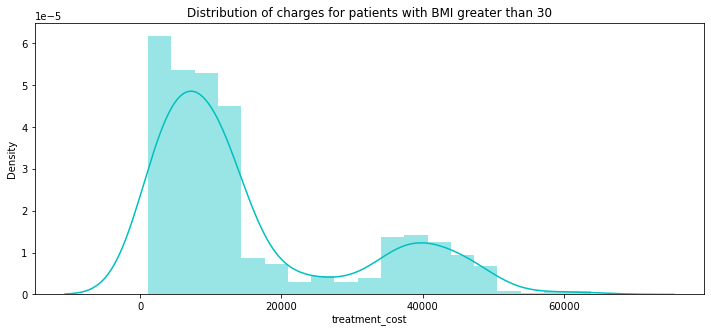

In [29]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
sns.distplot(df1[(df1.bmi >= 30)]['treatment_cost'], color = 'c')

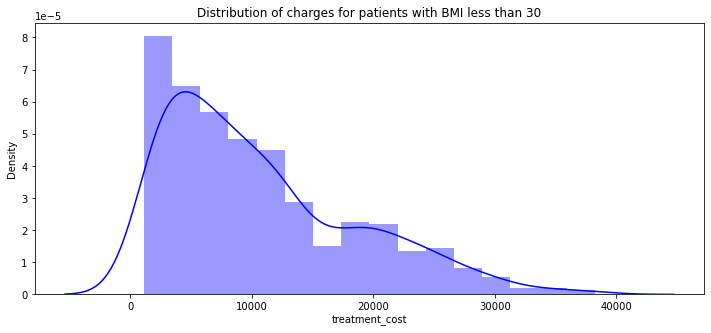

In [30]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df1[(df1.bmi < 30)]['treatment_cost'], color = 'b')

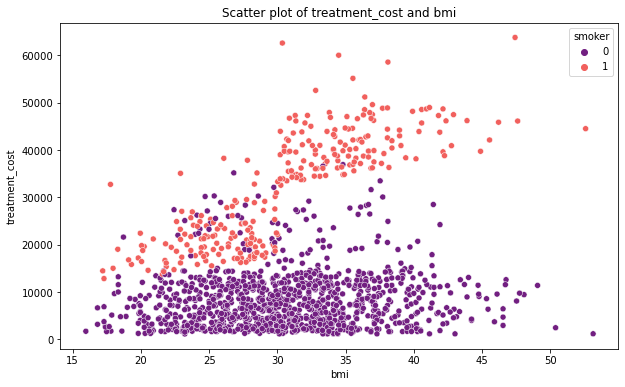

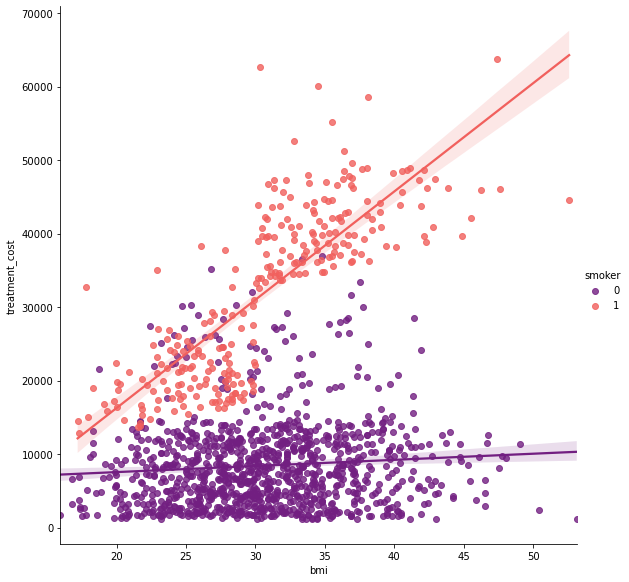

In [31]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='treatment_cost',data=df1,palette='magma',hue='smoker')
ax.set_title('Scatter plot of treatment_cost and bmi')

sns.lmplot(x="bmi", y="treatment_cost", hue="smoker", data=df1, palette = 'magma', size = 8)

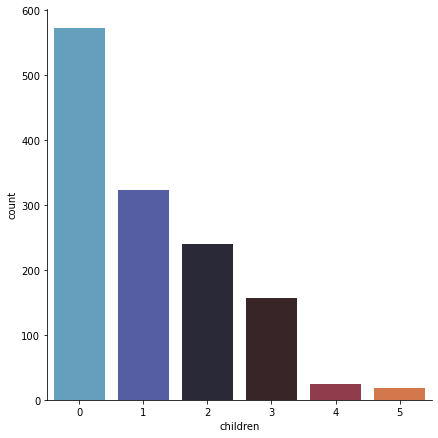

In [32]:
sns.catplot(x="children", kind="count", palette="icefire", data=df1, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

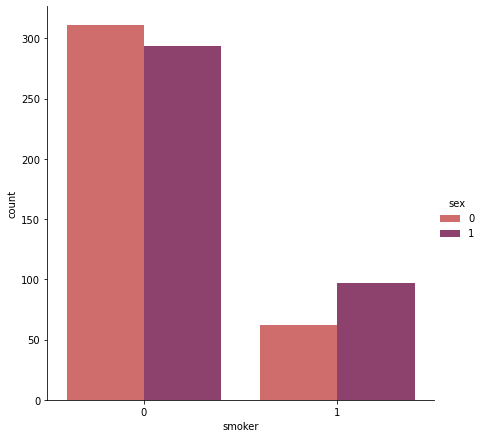

In [33]:
sns.catplot(x="smoker", kind="count", palette="flare",hue = "sex",
            data=df1[(df1.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

# Developing Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [35]:
X = df1.drop(['treatment_cost','region','sex'], axis=1)
y = df1.treatment_cost

In [36]:
X_final = X.values
y_final = y.values

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final, test_size=.25, random_state = 42)

In [38]:
print(X_final.shape, X_train.shape, X_test.shape)

(1337, 4) (1002, 4) (335, 4)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.8629477 , -0.76233578, -0.91222776, -0.50716324],
       [ 1.71517467,  0.50682967,  1.59660724, -0.50716324],
       [ 0.49772799, -0.28494327,  0.7603289 , -0.50716324],
       ...,
       [-1.36424928, -1.43268136, -0.07594943, -0.50716324],
       [-0.07518809, -0.43464824,  1.59660724, -0.50716324],
       [-0.29003162,  0.87277515,  0.7603289 , -0.50716324]])

In [41]:
X_test_scaled = scaler.transform(X_test)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test_scaled)

In [45]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[ 8688.85885   ,  7739.14195762],
       [ 5708.867     ,  5887.09461096],
       [11436.73815   , 14097.8233208 ],
       [38746.3551    , 31630.72066816],
       [ 4463.2051    ,  9256.38624116],
       [ 9304.7019    , 13420.20307152],
       [38511.6283    , 29830.54896417],
       [ 2150.469     ,  1636.63355803],
       [ 7345.7266    , 10834.62072336],
       [10264.4421    , 11235.05430836],
       [13415.0381    , 10256.81886419],
       [24393.6224    , 33045.46678846],
       [37607.5277    , 30580.32360317],
       [13063.883     , 17312.94346807],
       [24915.04626   , 10151.05065576],
       [ 8027.968     ,  9721.26041518],
       [ 1980.07      ,  4354.76475172],
       [38709.176     , 32049.39536767],
       [ 3484.331     ,  3500.06286482],
       [ 3947.4131    ,  5521.9333121 ],
       [ 1880.07      ,  3823.41334002],
       [20773.62775   , 29839.54403494],
       [ 9800.8882    , 15012.52800395],
       [21082.16      , 30663.38397989],
       [55135.40

In [46]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

4077.039602705058
35577850.41155418
0.7942404225670413


# k fold cross validation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cvs = cross_val_score(lr, X,y,cv=10)
cvs

array([0.7852589 , 0.73403114, 0.73997283, 0.66864286, 0.76705031,
       0.78574399, 0.78970647, 0.66690793, 0.74070848, 0.76606577])

In [49]:
cvs.mean()

0.7444088690911302

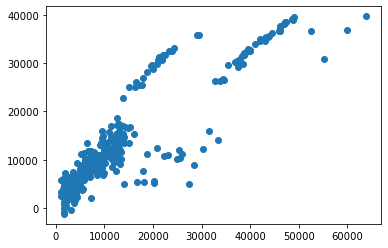

In [50]:
plt.scatter(y_test,y_pred)

# Another Regressor

In [52]:
X = df1.drop(['treatment_cost','region'], axis = 1)
Y = df1.treatment_cost

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(x_quad,Y, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plr = LinearRegression().fit(X_train_scaled,y_train)
print(plr.score(X_test_scaled,y_test))

0.8731524255141753


In [53]:
cvs = cross_val_score(plr, X,Y,cv=10)
cvs

array([0.78342082, 0.73418073, 0.73868103, 0.66867419, 0.76657554,
       0.78590932, 0.789768  , 0.66611496, 0.74083875, 0.76539299])

In [54]:
cvs.mean()

0.7439556330561902